# **Capstone project: Providing data-driven suggestions for HR**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree


# For saving models
import pickle

In [57]:
df0 = pd.read_csv(r"E:\Data analysis\Fiverr gig images\Upwork\Python\HR_capstone_dataset.csv")

In [58]:
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understanding the variables
- Cleaning our dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [59]:
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [60]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [61]:
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [63]:
# Renaming columns as needed

df0.rename(columns={
    'time_spend_company': 'years_spent',
    'last_evaluation': 'previous_score',
    'number_project': 'number_of_projects',
    'left': 'left_organization'
}, inplace=True)

df0.columns

Index(['satisfaction_level', 'previous_score', 'number_of_projects',
       'average_montly_hours', 'years_spent', 'Work_accident',
       'left_organization', 'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [64]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
previous_score           0
number_of_projects       0
average_montly_hours     0
years_spent              0
Work_accident            0
left_organization        0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [65]:
# Check for duplicates
a=df0.duplicated()


In [66]:
# Inspect some rows containing duplicates as needed
df0[a]

,satisfaction_level,previous_score,number_of_projects,average_montly_hours,years_spent,Work_accident,left_organization,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [67]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,previous_score,number_of_projects,average_montly_hours,years_spent,Work_accident,left_organization,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [68]:
df1.shape

(11991, 10)

### Check outliers

Check for outliers in the data.

In [69]:
numerical_cols = df1.select_dtypes(include=['number'])
numerical_cols.drop(['Work_accident','left_organization','promotion_last_5years'],axis=1,inplace=True)
numerical_cols.head()


,satisfaction_level,previous_score,number_of_projects,average_montly_hours,years_spent
0,0.38,0.53,2,157,3
1,0.80,0.86,5,262,6
2,0.11,0.88,7,272,4
3,0.72,0.87,5,223,5
4,0.37,0.52,2,159,3


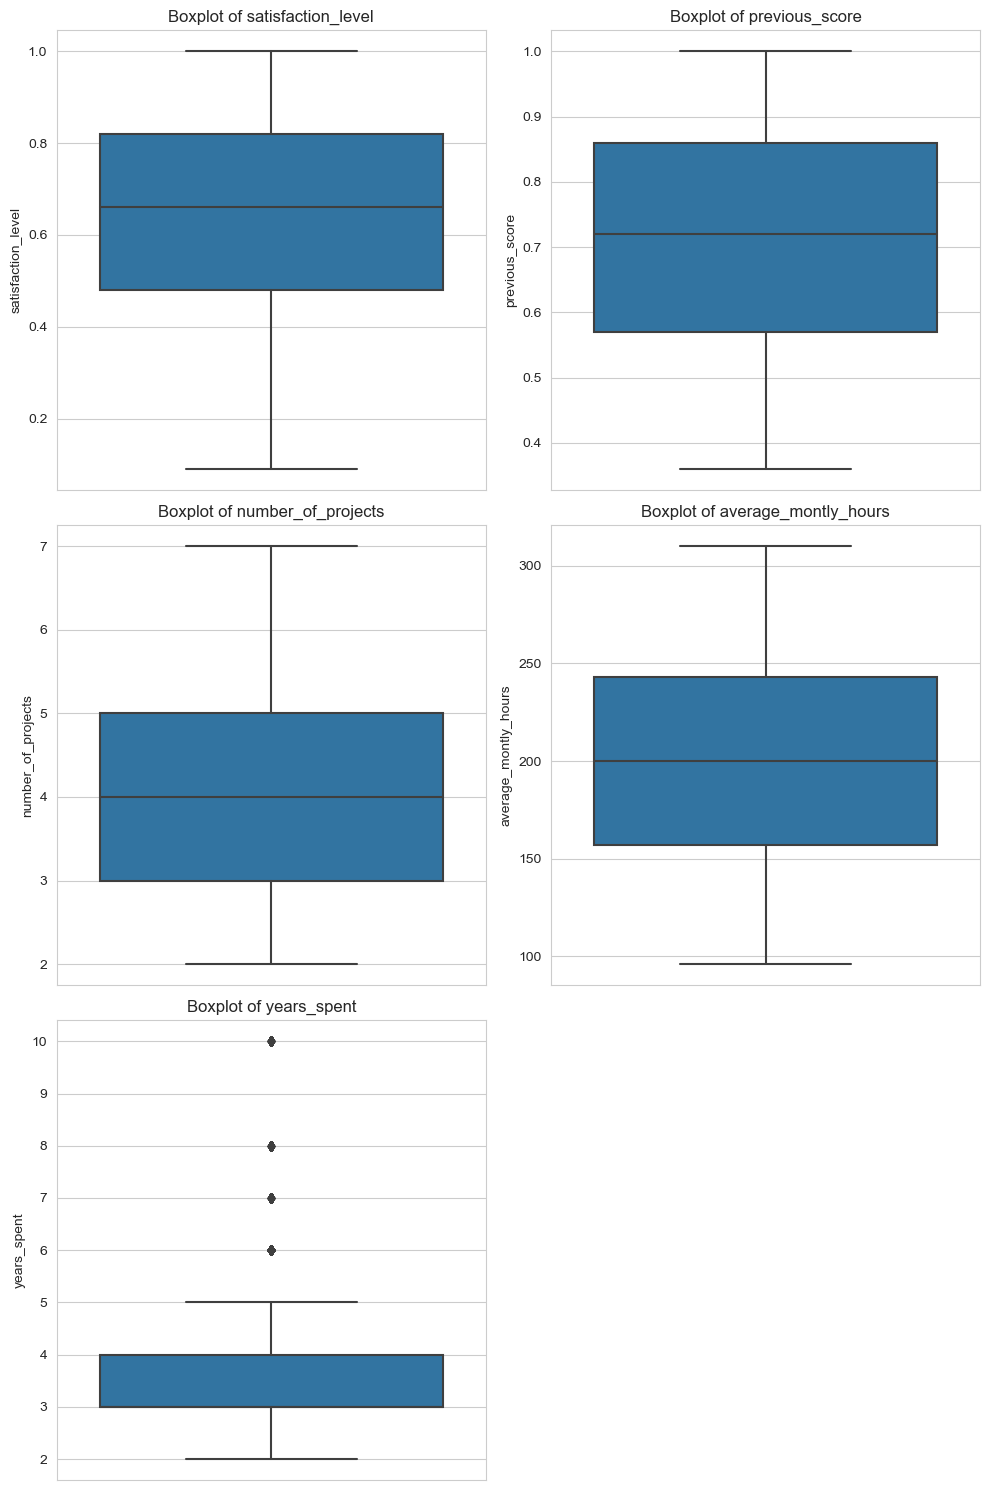

In [70]:
# Number of rows/columns for the subplot grid
n_cols = 2
n_rows = (len(numerical_cols.columns) + 1) // n_cols

# Creating subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*5))

# Flattening axes array for easy iterating
axes = axes.flatten()

# Plotting boxplots
for i, col in enumerate(numerical_cols.columns):
    sns.boxplot(y=col, data=numerical_cols, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='years_spent'>

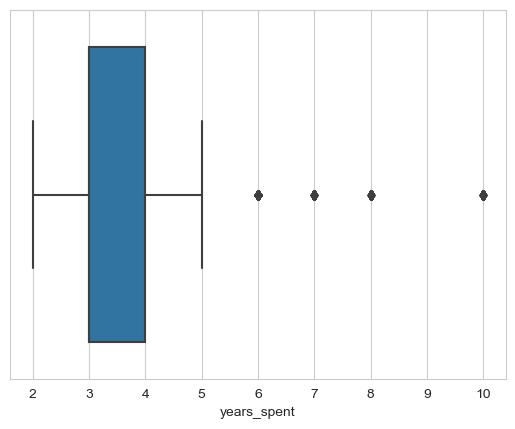

In [71]:
# Checking for Outliers in years_spent column
sns.boxplot(df1['years_spent'])


In [73]:
# Determining the number of rows containing outliers
q1 = df1['years_spent'].quantile(0.25)
q3 = df1['years_spent'].quantile(0.75)
IQR = q3-q1
ul = q3 + (1.5 * IQR)
ll = q1 - (1.5 * IQR)
print(len(df0[df0['years_spent']>ul]) + len(df0[df0['years_spent']<ll]))

1282


Certain types of models are more sensitive to outliers than others. When we get to the stage of building our model, consider whether to remove outliers, based on the type of model we decide to use.

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

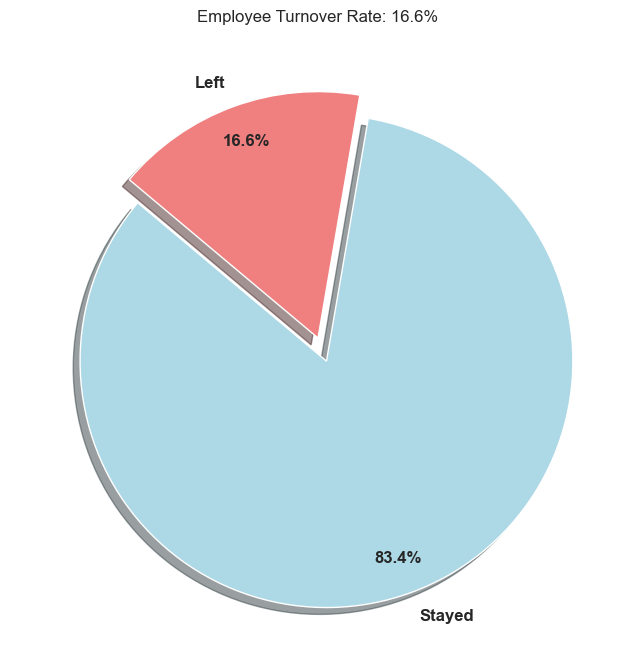

In [74]:

# Get numbers of people who left vs. stayed
left_vs_stayed = df1['left_organization'].value_counts()

# Get percentages of people who left vs. stayed
turnover_rate = len(df1[df1['left_organization'] == 1]) / (len(df1[df1['left_organization'] == 0]) + len(df1[df1['left_organization'] == 1]))

# Create a pie chart
labels = ['Stayed', 'Left']
sizes = [left_vs_stayed[0], left_vs_stayed[1]]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # Explode the "Left" slice

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140, pctdistance=0.85)
plt.title(f'Employee Turnover Rate: {turnover_rate*100:.1f}%')

# Adjust data label positions
for text, autotext in zip(texts, autotexts):
    text.set(size=12, weight='bold')
    autotext.set(size=12, weight='bold')
plt.show()

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

Text(0.5, 1.0, 'Avg. Monthly Hours Correlation with Satisfaction Level')

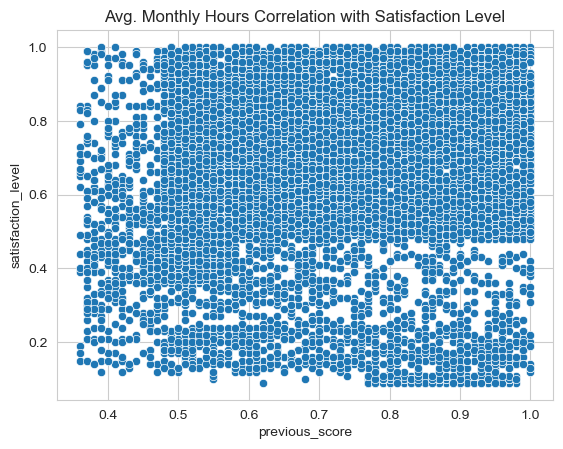

In [75]:
sns.scatterplot(x='previous_score',y='satisfaction_level',data=df1)
plt.title('Avg. Monthly Hours Correlation with Satisfaction Level')


In [77]:
import plotly.graph_objs as go
salary_colors = {
    'low': 'blue',   
    'medium': 'orange',
    'high': 'green'
}

data = []
for salary in df1['salary'].unique():
    subset = df1[df1['salary'] == salary]
    trace = go.Scatter3d(
        x=subset['satisfaction_level'],
        y=subset['average_montly_hours'],
        z=subset['number_of_projects'],
        mode='markers',
        marker=dict(
            size=5,
            color=salary_colors[salary],
            opacity=0.7
        ),
        name=salary
    )
    data.append(trace)

layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Satisfaction Level'),
        yaxis=dict(title='Average Monthly Hours'),
        zaxis=dict(title='Number of Projects'),
    ),
    margin=dict(l=0, r=0, b=0, t=0)
)


fig = go.Figure(data=data, layout=layout)

fig.show()


<AxesSubplot:xlabel='number_of_projects', ylabel='satisfaction_level'>

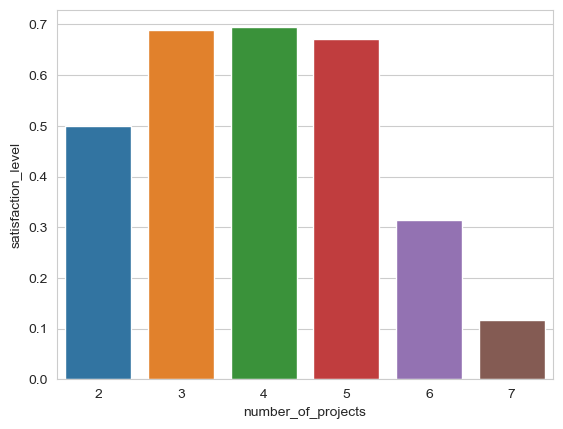

In [116]:
gb = df1.groupby('number_of_projects')['satisfaction_level'].mean().reset_index()

sns.barplot(x='number_of_projects',y='satisfaction_level',data=gb)

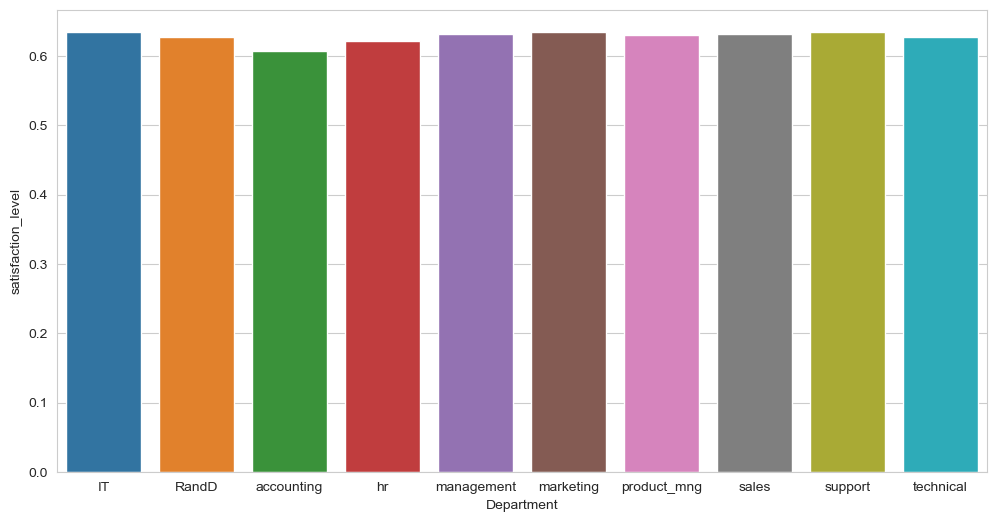

In [83]:
# Group by Department and calculate the mean satisfaction level
gb = df1.groupby('Department')['satisfaction_level'].mean().reset_index()

# Plot the barplot
plt.figure(figsize=(12, 6))  # Adjust the figure size as per your preference
sns.barplot(x='Department', y='satisfaction_level', data=gb)

plt.show()


<AxesSubplot:xlabel='left_organization', ylabel='satisfaction_level'>

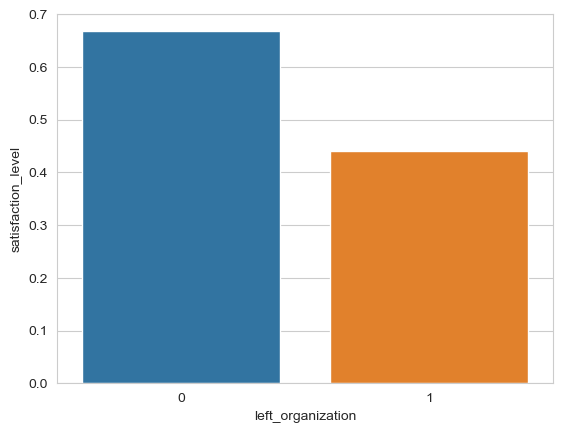

In [85]:
b = df1.groupby('left_organization')['satisfaction_level'].mean().reset_index()
b.head(10)
sns.barplot(x='left_organization',y='satisfaction_level',data=b)

<AxesSubplot:xlabel='salary', ylabel='satisfaction_level'>

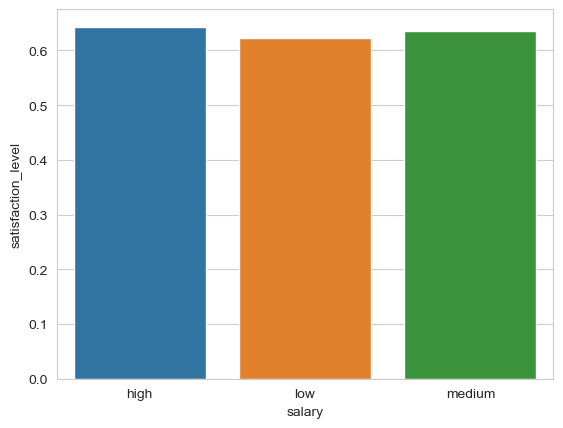

In [86]:
a = df1.groupby('salary')['satisfaction_level'].mean().reset_index()
a.head(10)
sns.barplot(x='salary',y='satisfaction_level',data=a)

<AxesSubplot:xlabel='years_spent', ylabel='left_organization'>

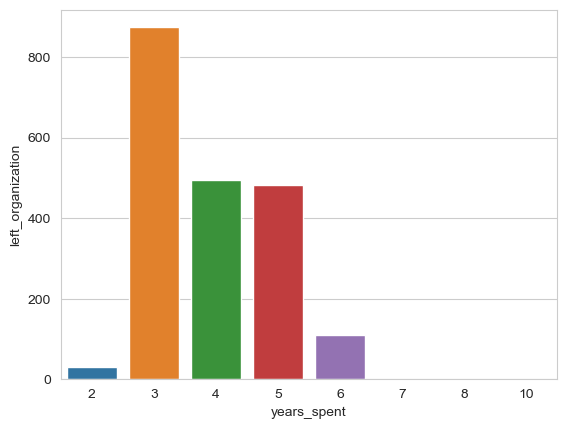

In [87]:
gb = df1.groupby('years_spent')['left_organization'].sum().reset_index()
gb.head(10)
sns.barplot(x='years_spent',y='left_organization',data=gb)

In [88]:
gb = df1.groupby('years_spent')['left_organization'].agg(['sum', 'count']).reset_index()

# Calculate the percentage of employees that left
gb['left_percentage'] = gb['sum'] / gb['count'] * 100

gb

,years_spent,sum,count,left_percentage
0,2,31,2910,1.065292
1,3,874,5190,16.840077
2,4,495,2005,24.688279
3,5,482,1062,45.386064
4,6,109,542,20.110701
5,7,0,94,0.000000
6,8,0,81,0.000000
7,10,0,107,0.000000


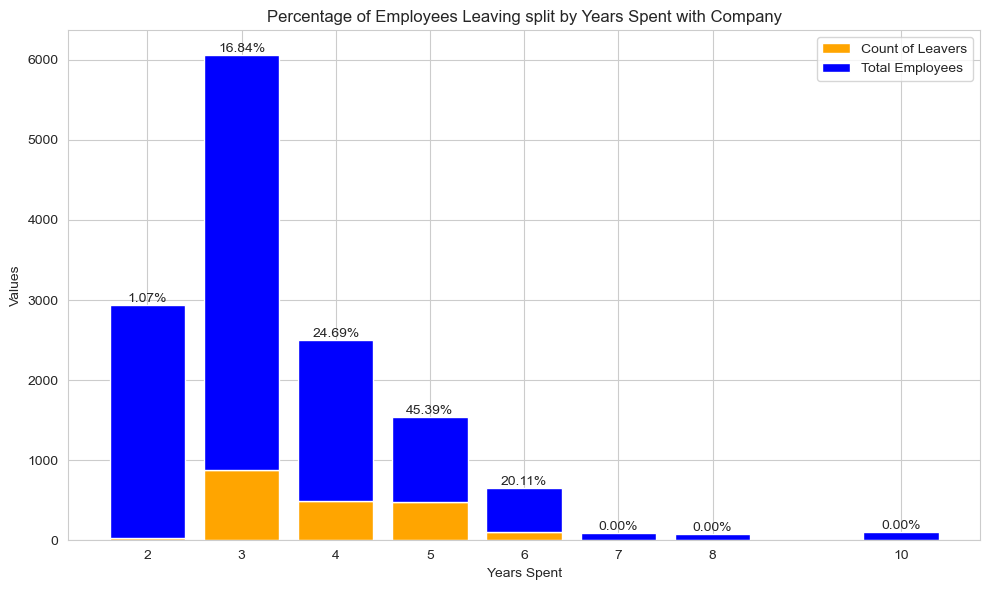

In [89]:
# Correcting the order of the stacks and re-plotting the chart.

# Plotting the stacked bar chart with 'sum' at the bottom, 'count' on top, and 'left_percentage' as data label.
fig, ax = plt.subplots(figsize=(10, 6))

# Stacking 'count' on top of 'sum' and showing 'left_percentage' as data label
bars = plt.bar(gb['years_spent'], gb['sum'], label='Count of Leavers', color='orange')
bars2 = plt.bar(gb['years_spent'], gb['count'], bottom=gb['sum'], label='Total Employees', color='blue')

# Adding the data labels for 'left_percentage'
for idx, rect in enumerate(bars):
    height = rect.get_height() + bars2[idx].get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, f"{gb['left_percentage'].iloc[idx]:.2f}%", ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Years Spent')
plt.ylabel('Values')
plt.title('Percentage of Employees Leaving split by Years Spent with Company')
plt.xticks(gb['years_spent'])

# Adding a legend
plt.legend()

# Display the chart
plt.tight_layout()
plt.show()


45.39% of staff who completed 5 years left the company

## Step 3. Model Building
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Modeling

Add as many cells as you need to conduct the modeling process.

In [98]:
### One Hot Encoding ###
df=pd.get_dummies(df1,drop_first=True)
df.head()


,satisfaction_level,previous_score,number_of_projects,average_montly_hours,years_spent,Work_accident,left_organization,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [91]:
ctc = ['Work_accident','left_organization','promotion_last_5years']
df[ctc]=df[ctc].astype('category')

In [99]:
df=pd.get_dummies(columns=ctc,data=df,drop_first=True)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11991 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   satisfaction_level       11991 non-null  float64
 1   previous_score           11991 non-null  float64
 2   number_of_projects       11991 non-null  int64  
 3   average_montly_hours     11991 non-null  int64  
 4   years_spent              11991 non-null  int64  
 5   Department_RandD         11991 non-null  uint8  
 6   Department_accounting    11991 non-null  uint8  
 7   Department_hr            11991 non-null  uint8  
 8   Department_management    11991 non-null  uint8  
 9   Department_marketing     11991 non-null  uint8  
 10  Department_product_mng   11991 non-null  uint8  
 11  Department_sales         11991 non-null  uint8  
 12  Department_support       11991 non-null  uint8  
 13  Department_technical     11991 non-null  uint8  
 14  salary_low            

In [101]:
x=df.drop('left_organization_1',axis=1)
y=df['left_organization_1']

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y,random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

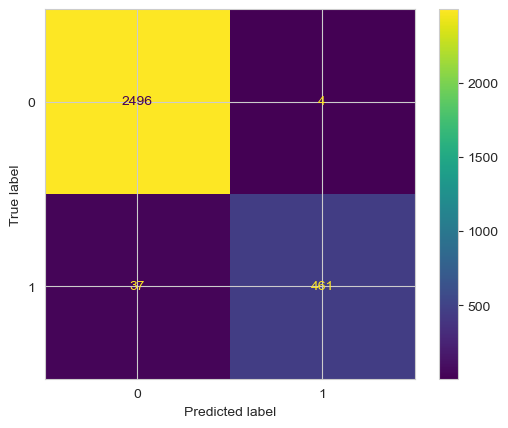

In [103]:
# Compute values for confusion matrix
rf_cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

# Create display of confusion matrix
rf_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
                                  display_labels=rf.classes_)

# Plot confusion matrix
rf_disp.plot(values_format='')

# Display plot
plt.show()

In [ ]:
# Above visualization shows that model has very good accurate prediction rate for both classes i.e 0 and 1. 
# Hence it is recommended to use this model to predict if an employee will leave organization or stay

In [104]:
report = classification_report(y_test, y_pred)

# Display the classification report
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       0.99      0.93      0.96       498

    accuracy                           0.99      2998
   macro avg       0.99      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998



In [97]:
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

# Comparing the model's performance on both sets
train_accuracy = classification_report(y_train, y_train_pred)
test_accuracy = classification_report(y_test, y_test_pred)

print("Training Report:", train_accuracy)
print("Testing Report:", test_accuracy)

Training Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7500
           1       1.00      1.00      1.00      1493

    accuracy                           1.00      8993
   macro avg       1.00      1.00      1.00      8993
weighted avg       1.00      1.00      1.00      8993

Testing Report:               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       0.99      0.93      0.96       498

    accuracy                           0.99      2998
   macro avg       0.99      0.96      0.97      2998
weighted avg       0.99      0.99      0.99      2998



In [105]:
df_predictions = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df_predictions.head()

,Actual,Prediction
11098,0,0
5472,0,0
7367,0,0
3605,0,0
3248,0,0


In [106]:
df_new = pd.concat([x_test, df_predictions], axis=1)
df_new.head()

,satisfaction_level,previous_score,number_of_projects,average_montly_hours,years_spent,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium,Work_accident_1,promotion_last_5years_1,Actual,Prediction
11098,0.69,0.83,4,252,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5472,0.19,0.64,5,181,4,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0
7367,0.79,0.78,2,228,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3605,0.73,0.81,4,245,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3248,0.76,0.62,3,150,2,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0


In [108]:
df_errors =df_new[df_new['Actual'] != df_new['Prediction']]
df_errors1 = df_errors[df_errors['Actual']==1]
df_errors0 = df_errors[df_errors['Actual']==0]

In [114]:
print(len(df_errors1))
print(len(df_errors0))

37
4


In [110]:
with open('rf.pkl', 'wb') as file:
    pickle.dump(rf, file)

Gradient Boosting


In [112]:
gboost = GradientBoostingClassifier(random_state=42)

gboost.fit(x_train, y_train)


y_train_pred = gboost.predict(x_train)


y_test_pred = gboost.predict(x_test)


print("Training Report:")
print(classification_report(y_train, y_train_pred))


print("Testing Report:")
print(classification_report(y_test, y_test_pred))

Training Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7500
           1       0.97      0.93      0.95      1493

    accuracy                           0.98      8993
   macro avg       0.98      0.96      0.97      8993
weighted avg       0.98      0.98      0.98      8993

Testing Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2500
           1       0.96      0.93      0.94       498

    accuracy                           0.98      2998
   macro avg       0.97      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



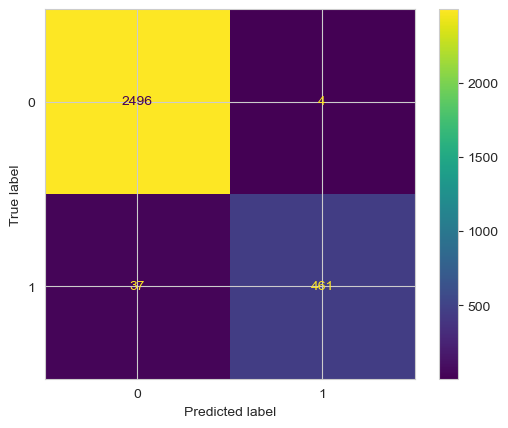

In [113]:
# Compute values for confusion matrix
gb_cm = confusion_matrix(y_test, y_pred, labels=gboost.classes_)

# Create display of confusion matrix
gb_disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
                                  display_labels=rf.classes_)

# Plot confusion matrix
gb_disp.plot(values_format='')

# Display plot
plt.show()